<a href="https://colab.research.google.com/github/hernanmorales-navarrete/DataAnalysisWithPython/blob/main/Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis with Python


- This interactive Jupyter Notebook provides an introduction on Python packages for data analysis. This notebook incorporates real examples and exercises to engage students and enhance their understanding of data importation, transformation, exploratory analysis, regression, clustering, feature selection, dimensionality reduction, and supervised classification.

## 1. Importing Modules & Packages

In [23]:
# Libraries for data manipulation and analysis
import numpy as np                # NumPy: for numerical operations on arrays and matrices
import pandas as pd               # Pandas: data manipulation and analysis library

# Libraries for data visualization and plotting
import matplotlib.pyplot as plt   # Matplotlib: primary library for data visualization
import seaborn as sns             # Seaborn: statistical data visualization, built on top of matplotlib

# Libraries for machine learning model selection and metrics
from sklearn.model_selection import train_test_split  # Train-test split for splitting data into training and test sets
from sklearn.linear_model import LinearRegression     # Linear regression model for regression tasks
from sklearn.linear_model import LogisticRegression   # Logistic regression model for classification tasks
from sklearn.metrics import accuracy_score            # Accuracy score metric for classification evaluation
from sklearn.metrics import mean_squared_error        # Mean squared error metric for regression evaluation
from sklearn.metrics import confusion_matrix          # Confusion matrix for classification evaluation

# Libraries for clustering, dimensionality reduction, and data preprocessing
from sklearn.cluster import KMeans                    # KMeans: for unsupervised clustering tasks
from sklearn.decomposition import PCA                 # PCA: for dimensionality reduction
from sklearn.preprocessing import StandardScaler      # StandardScaler: for standardizing features by removing the mean and scaling to unit variance
from sklearn.tree import DecisionTreeClassifier       # DecisionTreeClassifier: for classification tasks using decision trees
from sklearn import tree                              # Tree module: for working with decision tree models, including visualization

# Libraries for accessing datasets
from sklearn.datasets import load_iris               # Iris dataset: a sample dataset commonly used for machine learning tasks

In [24]:
# Set matplotlib backend
%matplotlib inline
#%matplotlib inline              # Displays as static figure in code cell output
#%matplotlib notebook            # Displays as interactive figure in code cell output
#%matplotlib qt                  # Displays as interactive figure in a separate window
sns.set(style="whitegrid")       # Set Seaborn's aesthetic style to 'whitegrid' for plots with a clean, grid-based background

## 2.  Data Import and Transformation

In [ ]:
# Using Pandas to load a sample dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
print("Data Snapshot:")
display(df.head())


Data Snapshot:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Exercise: Transforming the dataset
# Add a new column a
df['sepal_area'] = df['sepal_length'] * df['sepal_width']
# Rename columns species
df.rename(columns={'species': 'target'}, inplace=True)
# Move the 'target' column to the end of the DataFrame
df = df[[col for col in df.columns if col != 'target'] + ['target']]
print("\nTransformed Data:")
display(df.head())


Transformed Data:


,sepal_length,sepal_width,petal_length,petal_width,sepal_area,target
0,5.1,3.5,1.4,0.2,17.85,setosa
1,4.9,3.0,1.4,0.2,14.70,setosa
2,4.7,3.2,1.3,0.2,15.04,setosa
3,4.6,3.1,1.5,0.2,14.26,setosa
4,5.0,3.6,1.4,0.2,18.00,setosa


## 3. Exploratory Data Analysis (EDA)


Summary Statistics:


,sepal_length,sepal_width,petal_length,petal_width,sepal_area
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,17.822867
std,0.828066,0.435866,1.765298,0.762238,3.361854
min,4.300000,2.000000,1.000000,0.100000,10.000000
25%,5.100000,2.800000,1.600000,0.300000,15.660000
50%,5.800000,3.000000,4.350000,1.300000,17.660000
75%,6.400000,3.300000,5.100000,1.800000,20.325000
max,7.900000,4.400000,6.900000,2.500000,30.020000


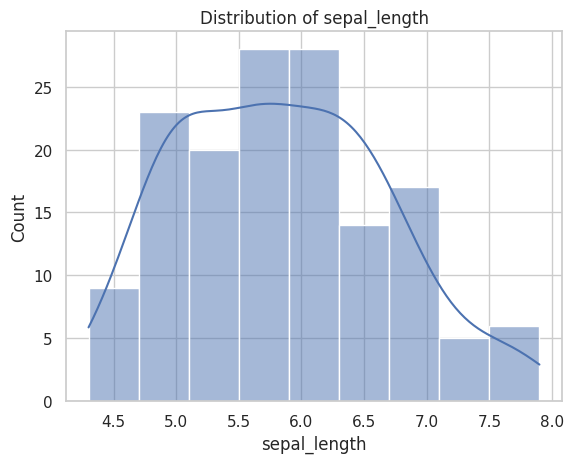

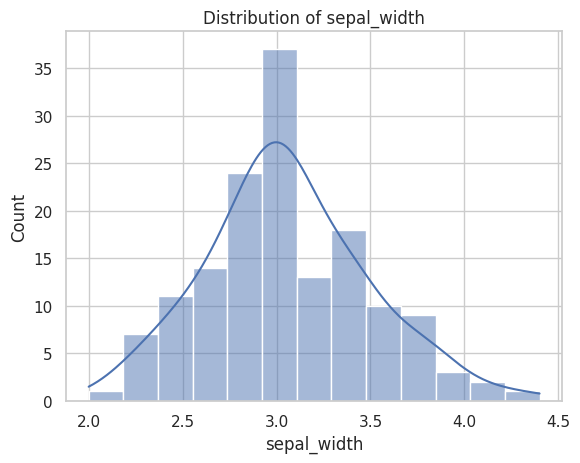

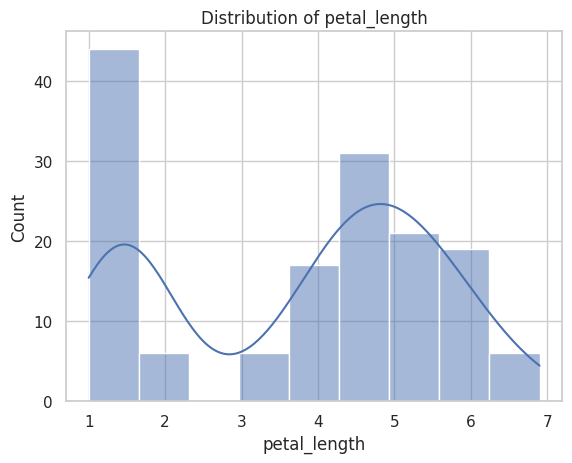

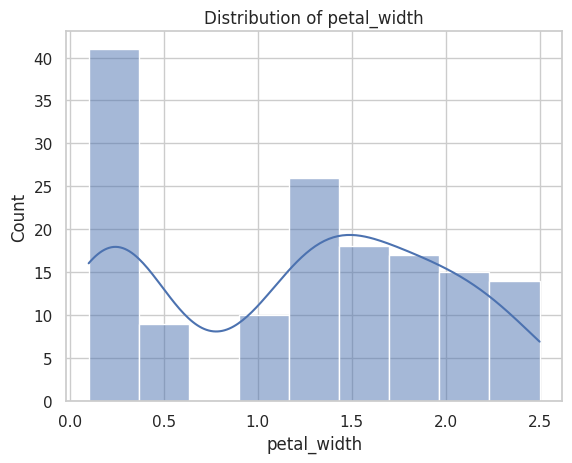

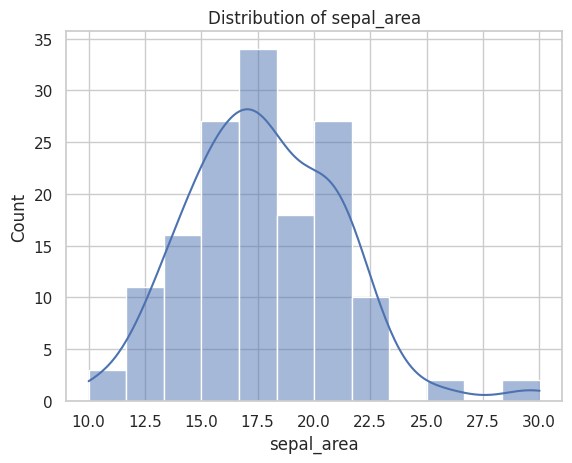

In [ ]:
print("\nSummary Statistics:")
display(df.describe())

# Plot distribution histograms for each feature
for column in df.columns[:-1]:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

## 4. Regression Analysis (SKLearn)


Regression Model - Mean Squared Error: 0.04299606049475493


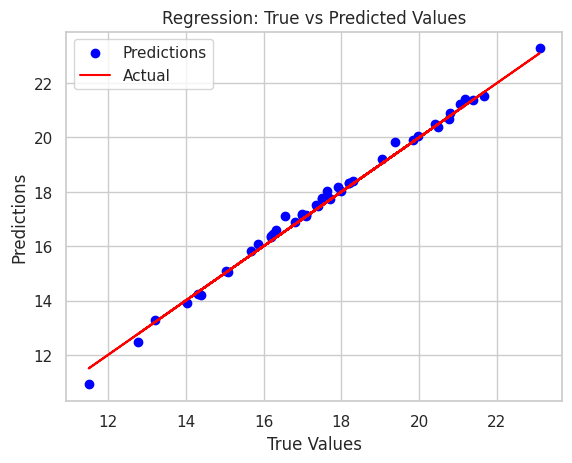

In [ ]:
# Prepare data for regression: predicting 'sepal_area' using other features
X = df.drop(columns=['target', 'sepal_area'])
y = df['sepal_area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Linear Regression model
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Display results and metrics
print("Regression Model - Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Plot predictions vs actual values
plt.figure()
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Regression: True vs Predicted Values")
plt.legend()
plt.show()



## 5. Clustering Analysis

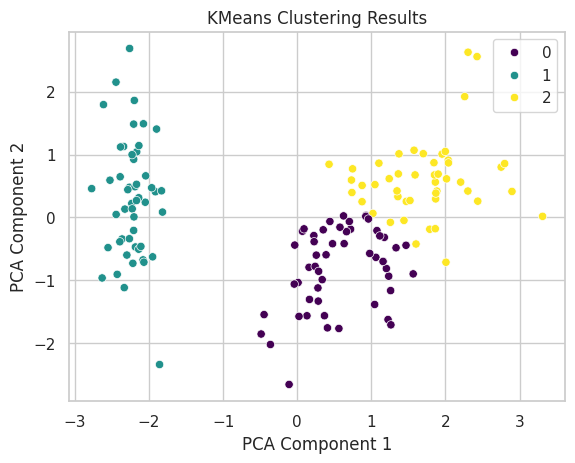

In [ ]:
# Use PCA to reduce dimensionality for visualization, then perform KMeans clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_pca)

# Visualize clusters
plt.figure()
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="viridis")
plt.title("KMeans Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


## 6. Feature Selection and Dimensionality Reduction

Explained Variance by each PCA component: [0.62424239 0.34013487 0.03072647 0.00416215 0.00073411]


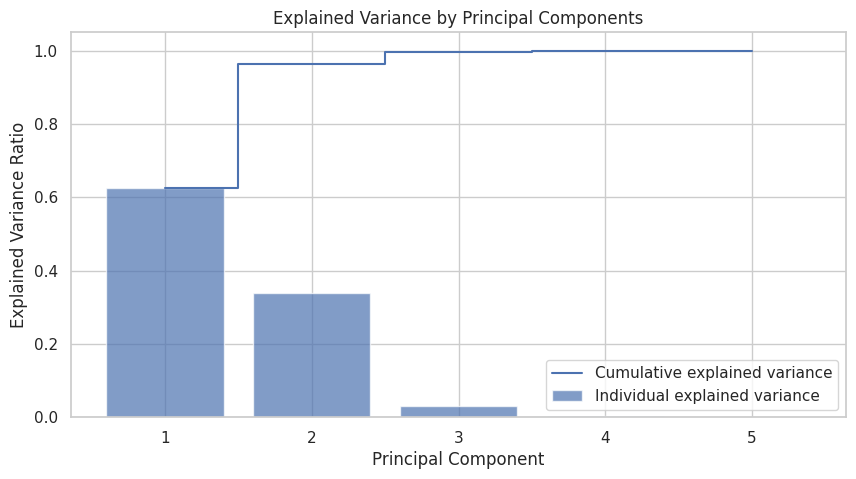


Interpretation of Principal Components:


,sepal_length,sepal_width,petal_length,petal_width,sepal_area
PC1,0.541197,-0.136583,0.547503,0.536119,0.318228
PC2,0.119899,0.734465,-0.166036,-0.139389,0.631813
PC3,-0.621787,0.385528,0.162463,0.646022,-0.144952
PC4,-0.222276,0.162617,0.803888,-0.524668,-0.051350
PC5,-0.506660,-0.516556,-0.006520,-0.022961,0.689852



Principal Component 1 Composition:
petal_length: 0.55
sepal_length: 0.54
petal_width: 0.54
sepal_area: 0.32
sepal_width: -0.14

Principal Component 2 Composition:
sepal_width: 0.73
sepal_area: 0.63
petal_length: -0.17
petal_width: -0.14
sepal_length: 0.12

Principal Component 3 Composition:
petal_width: 0.65
sepal_length: -0.62
sepal_width: 0.39
petal_length: 0.16
sepal_area: -0.14

Principal Component 4 Composition:
petal_length: 0.80
petal_width: -0.52
sepal_length: -0.22
sepal_width: 0.16
sepal_area: -0.05

Principal Component 5 Composition:
sepal_area: 0.69
sepal_width: -0.52
sepal_length: -0.51
petal_width: -0.02
petal_length: -0.01

Interpretation Summary:
For instance, Principal Component 1 (PC1) may be primarily influenced by features that have high weights in this component.
If PC1 shows high positive values for features A and B, this indicates that PC1 captures a combination where both A and B vary in the same direction.
This analysis helps in understanding the primary drive

In [26]:
# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA, keeping as many components as there are features
pca = PCA(n_components=len(X.columns))
X_pca = pca.fit_transform(X_scaled)

# Display explained variance by each component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by each PCA component:", explained_variance)

# Plot explained variance by each component
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()

# Analysis and interpretation of principal components
print("\nInterpretation of Principal Components:")
components = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(len(X.columns))])
display(components)

# Interpretation of feature contributions to each principal component
for i, component in enumerate(pca.components_):
    print(f"\nPrincipal Component {i+1} Composition:")
    feature_contributions = {X.columns[j]: component[j] for j in range(len(X.columns))}
    sorted_contributions = sorted(feature_contributions.items(), key=lambda x: abs(x[1]), reverse=True)
    for feature, contribution in sorted_contributions:
        print(f"{feature}: {contribution:.2f}")

# Example analysis for the first principal component
print("\nInterpretation Summary:")
print("For instance, Principal Component 1 (PC1) may be primarily influenced by features that have high weights in this component.")
print("If PC1 shows high positive values for features A and B, this indicates that PC1 captures a combination where both A and B vary in the same direction.")
print("This analysis helps in understanding the primary drivers of variance in the dataset.")

# Print cumulative variance for reference
cumulative_variance = explained_variance.cumsum()
for i, cum_var in enumerate(cumulative_variance, 1):
    print(f"Cumulative variance after {i} components: {cum_var:.2%}")


## 6. Supervised Classification

Classification Accuracy: 0.9777777777777777


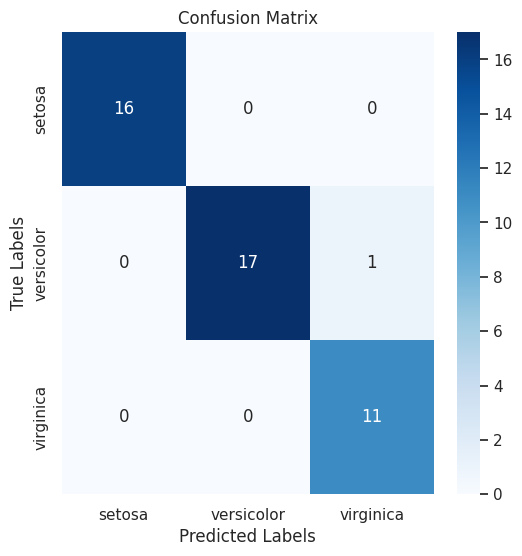

In [ ]:
# Using Logistic Regression on the Iris dataset to classify species
X = df.drop(columns='target')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Print accuracy and plot confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Decision Tree Classification Accuracy: 0.9777777777777777


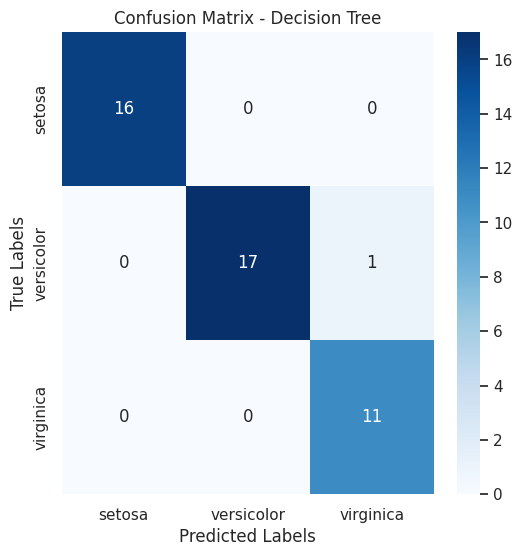

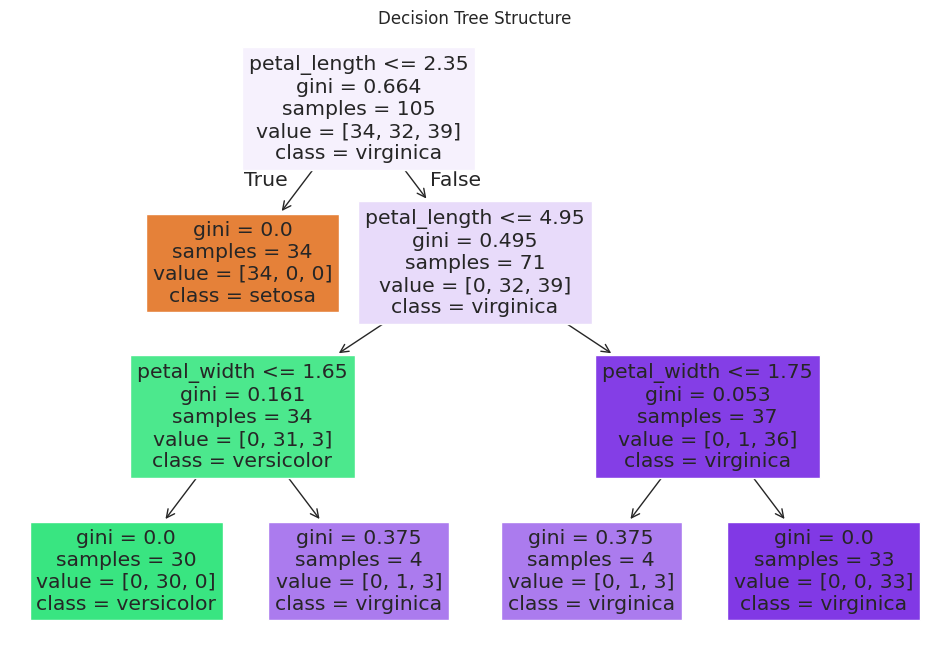

In [ ]:
# Initialize the Decision Tree model with a specified maximum depth
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

# Calculate accuracy and display the results using a confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classification Accuracy:", accuracy)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=dtree.classes_)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dtree.classes_, yticklabels=dtree.classes_)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dtree, feature_names=X.columns, class_names=dtree.classes_.astype(str), filled=True)
plt.title("Decision Tree Structure")
plt.show()